## Ben Branchflower
## Homework 5
This homework works with some dimensionality reudction and clustering.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# to display plots by default
%matplotlib inline

seed = 17 # establishing the seed to be used throughout the code
np.random.RandomState(seed)

# suppressing deprecation warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
mnist = datasets.fetch_mldata("MNIST Original")
X = mnist.data
y = mnist.target

### 1. Use PCA to reduce the dimensionality
Reducing the dimensionality can be kind of touchy as we want to keep the variation that gives us predictive power but we do not want to keep all of the variables. I will plot the amount of variation that we get from different amounts of variables to see where we can get some of both.

95% of variation comes from first 154 components


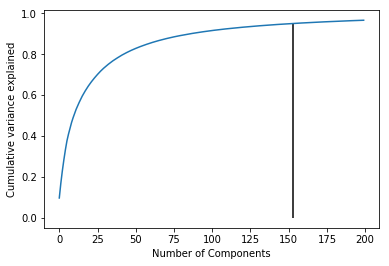

In [3]:
pca = PCA(n_components=200, random_state=seed)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
n_comp = [i for i, r in enumerate(cum_ratio) if r > 0.95][0] # getting the components that give 95% variation
change_var = [r - cum_ratio[i-1] if i != 0 else 0 for i, r in enumerate(cum_ratio)]
chg_chg = [r - change_var[i-1] if i != 0 else 0 for i, r in enumerate(change_var)]
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[n_comp],x=n_comp)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative variance explained")
print(f'95% of variation comes from first {n_comp + 1} components')

I will use 153 components as those components contain 95% of the variation in the data. That is nearly all of the variation that we get from the full set of variables but we have many fewer. 

In [4]:
pca = PCA(n_components=0.95) # using n components that give 95% variation
X_pca = pca.fit_transform(X)
X_pca.shape

(70000, 154)

Plot the first two components. Do you notice any trends? What is this plot showing us?

Text(30.2276,0.5,'1st Principal Component')

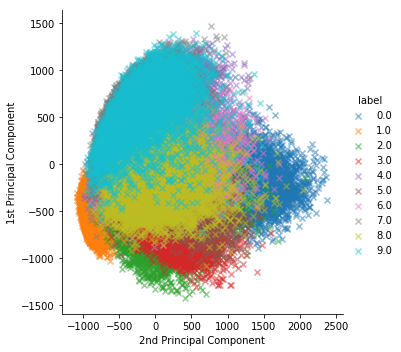

In [32]:
pca_ = PCA(n_components=2)
princ_comp = pca_.fit_transform(X)
princ_df = pd.DataFrame(princ_comp, columns=['comp1', 'comp2'])
princ_df['label'] = y
sns.lmplot(x='comp1', y='comp2', data=princ_df, hue='label', fit_reg=False, markers='x',
          scatter_kws={'alpha':'0.5'})
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

The points seem to be grouped around 0. There seems to be more values that are negative in the horziontal axis.

Why would you use PCA? What is it doing? And what are the drawbacks?  
PCA could be useful to reduce overfitting of a model or reduce computaton time of slower running models. It takes the the most significant variations from the points without needing to take all of them.  
It is finding othogonal vectors that maximize variation of the points along them.  
Some drawbacks include a loss of interprability of the model as the new columns are some combination of the old ones.

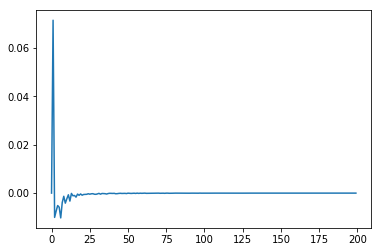

In [6]:
change_var = [r - cum_ratio[i-1] if i != 0 else 0 for i, r in enumerate(cum_ratio)]
chg_chg = [r - change_var[i-1] if i != 0 else 0 for i, r in enumerate(change_var)]
plt.plot(range(len(chg_chg)), chg_chg)

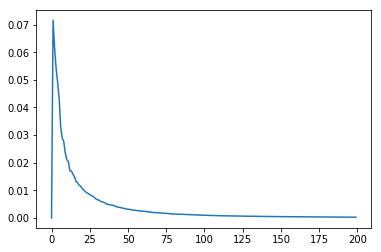

In [7]:
plt.plot(range(len(change_var)), change_var)

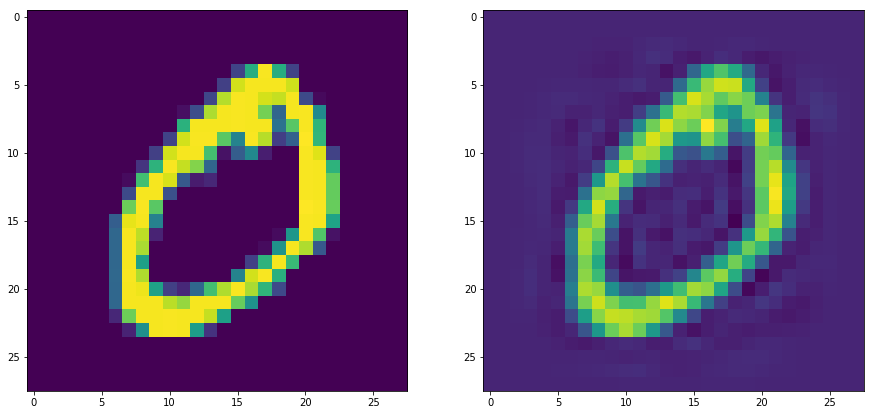

In [8]:
approximation = pca.inverse_transform(X_pca)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(X[0].reshape((28,28)))
plt.subplot(1,2,2)
plt.imshow(approximation[0].reshape((28,28)))

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

a. How does this plot differ from your PCA plot?

b. How robust is it to changes in perplexity?

c. How robust is it to different learning rate and number of iterations?

In [9]:
rows = np.random.randint(low=0, high=X.shape[0], size = 1000) # to reduce runtime

In [23]:
def tsne(n_components=2,perplexity=50, n_iter=1000, learning_rate=200, verbose=1,
        random_state=seed):
    tsne_ = TSNE(n_components=n_components, verbose=verbose, perplexity=perplexity,
                 n_iter=n_iter, learning_rate=learning_rate)
    tsne_results = tsne_.fit_transform(X_pca[rows,:])
    df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
    df_tsne['label'] = y[rows]
    return df_tsne

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 614.418500
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.978813
[t-SNE] KL divergence after 1000 iterations: 1.013631


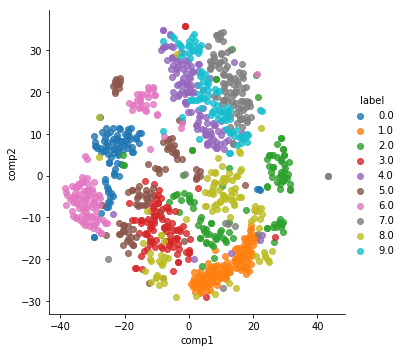

In [24]:
out = tsne()
sns.lmplot(x='comp1', y='comp2', data=out, hue='label', fit_reg=False)

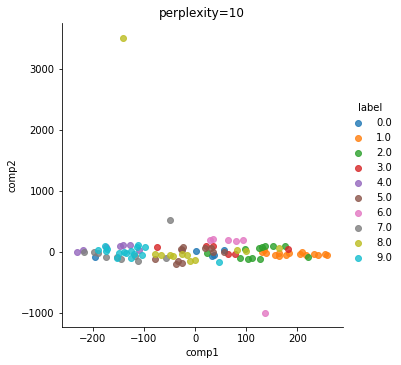

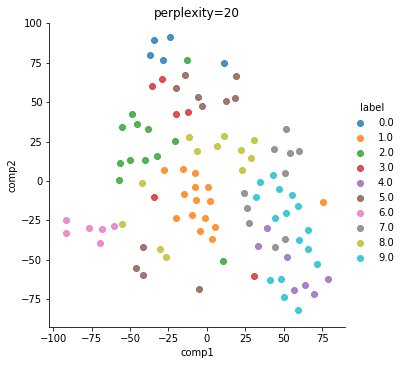

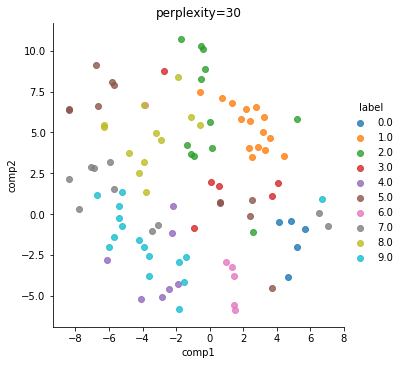

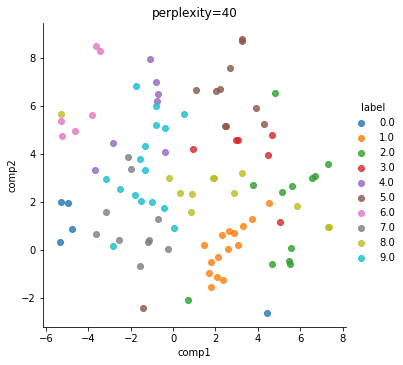

In [61]:
for p in [10,20,30,40]:
    out = tsne(perplexity=p, verbose=0)
    sns.lmplot(x='comp1', y='comp2', data=out, hue='label', fit_reg=False)
    plt.title(f'perplexity={p}')

robustness of changes in p

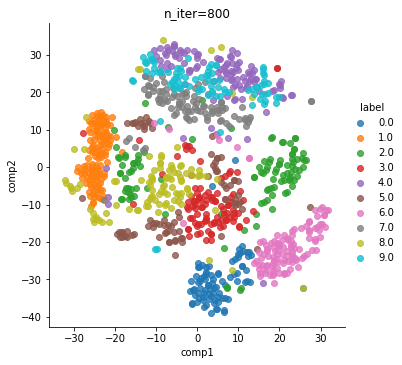

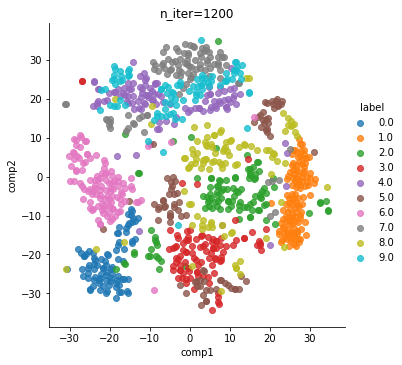

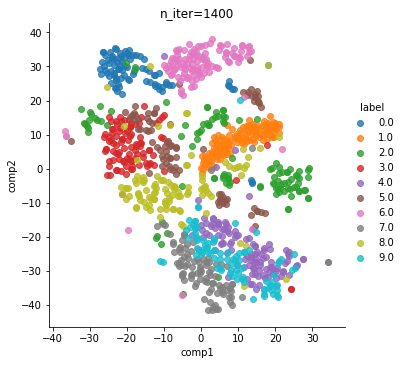

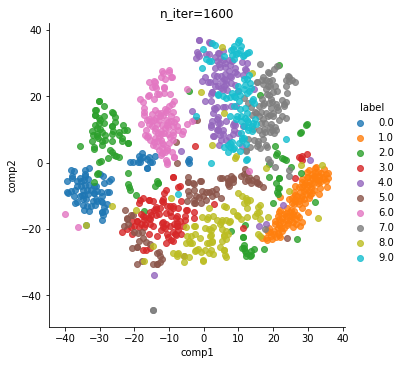

In [44]:
for i, n in enumerate([800,1200,1400,1600]):
    out = tsne(n_iter=n, verbose=0)
    sns.lmplot(x='comp1', y='comp2', data=out, hue='label', fit_reg=False)
    plt.title(f'n_iter={n}')

robustness of changes in n_iter

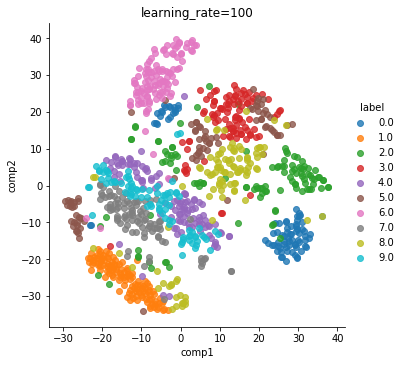

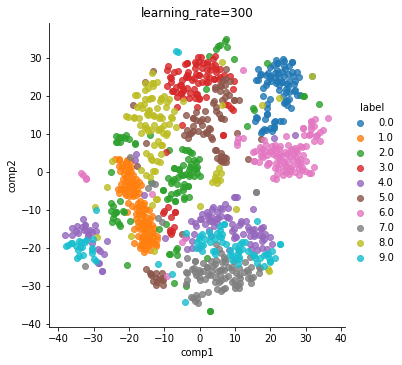

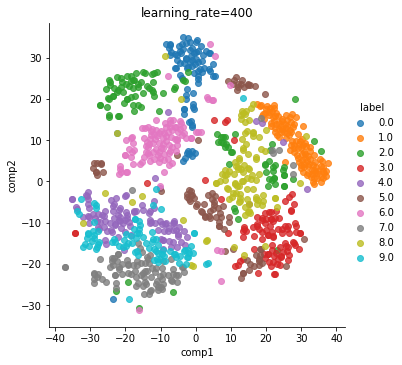

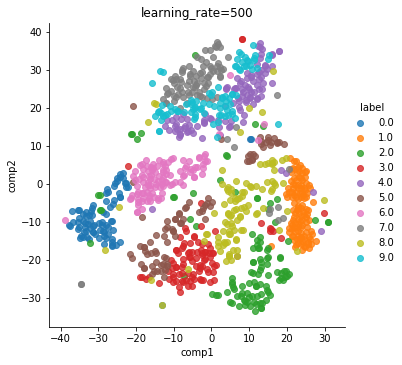

In [45]:
for i, l in enumerate([100,300,400,500]):
    out = tsne(learning_rate=l, verbose=0)
    sns.lmplot(x='comp1', y='comp2', data=out, hue='label', fit_reg=False)
    plt.title(f'learning_rate={l}')

robustness of changes in learning rate

In [ ]:
y[rows]

In [ ]:
princ_df['label'] = y
sns.lmplot(x='comp1', y='comp2', data=princ_df, hue='label', fit_reg=False)

In [ ]:
princ_df

# K-Means
a. How did you choose k?
There are 10 different numbers 0-9 so it would not be incredibly useful to custer the images into anything but 10 groups.

b. How did you evaluate your clustering?


c. Visualize your clusters using t-sne


d. Did you scale your data?


e. How robust is your clustering?



In [63]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(X[rows])
# kmeans.predict
# use predicted values as labels and use those on the already reduced data
sns.lmplot(x='comp1', y='comp2', data=tsne(X_kmeans), hue='label', fit_reg=False)

TypeError: '>' not supported between instances of 'KMeans' and 'int'

# Heriarchical Clustering
a. Plot your dendrogram

b. How many clusters seem reasonable based off your graph?

c. How does your dendrogram change with different linkage methods?

In [56]:
rows = np.random.randint(low=0, high=X.shape[0], size = 100) # to reduce runtime
def dendro(method):
    """make a dendrogram of hierarchical clustering with the specified method"""
    Z = linkage(X[rows], method)
    plt.figure(figsize=(20, 12))
    _ = dendrogram(Z)

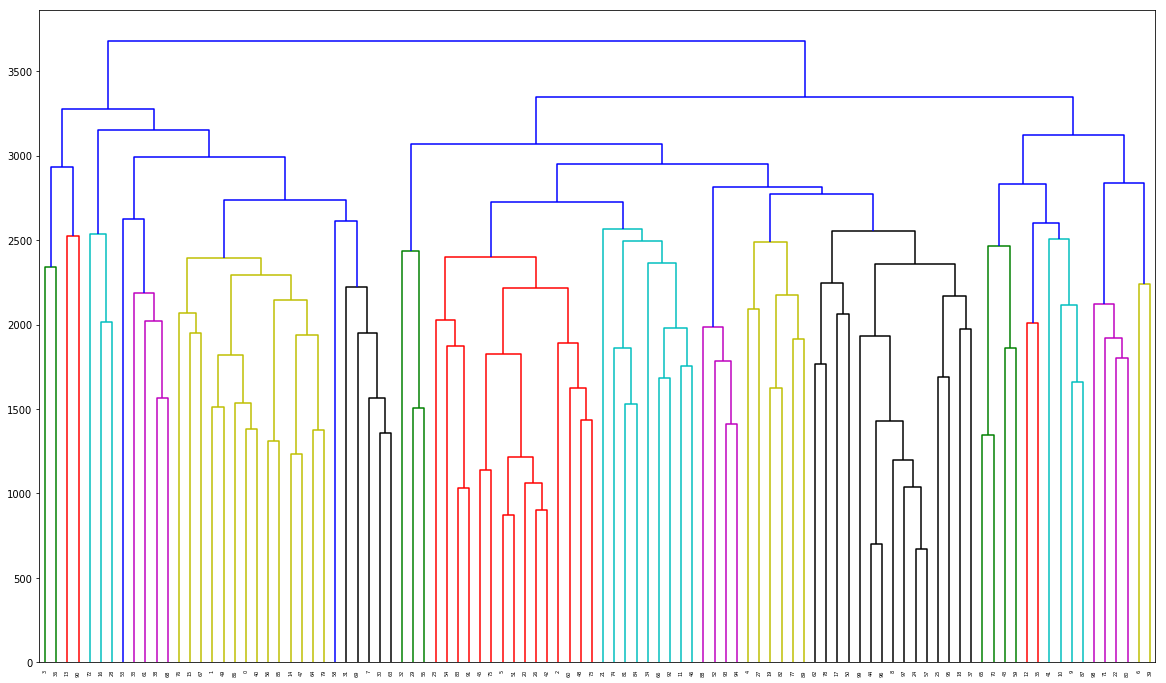

In [57]:
dendro('complete')

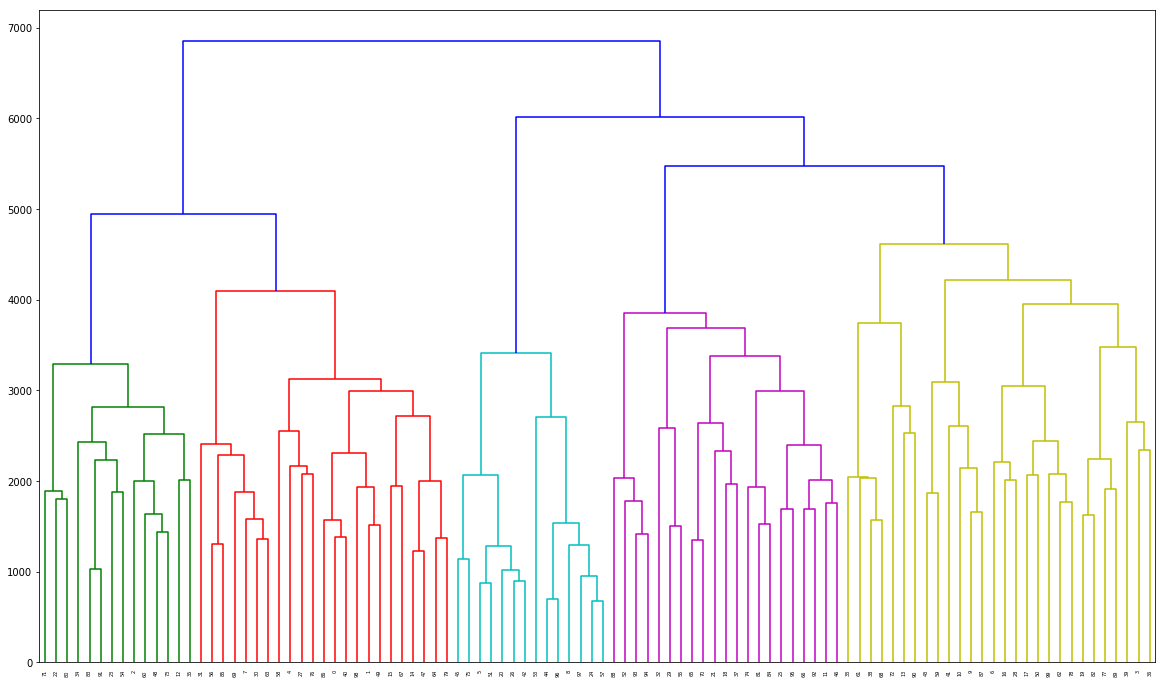

In [58]:
dendro('ward')

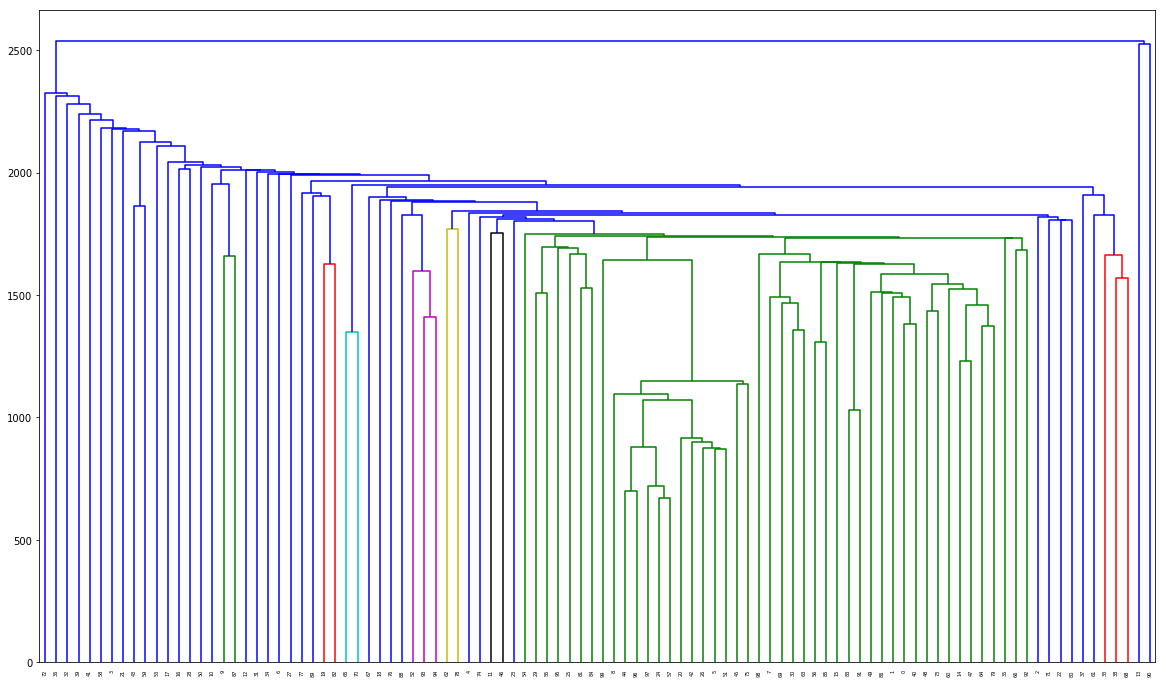

In [59]:
dendro('single')

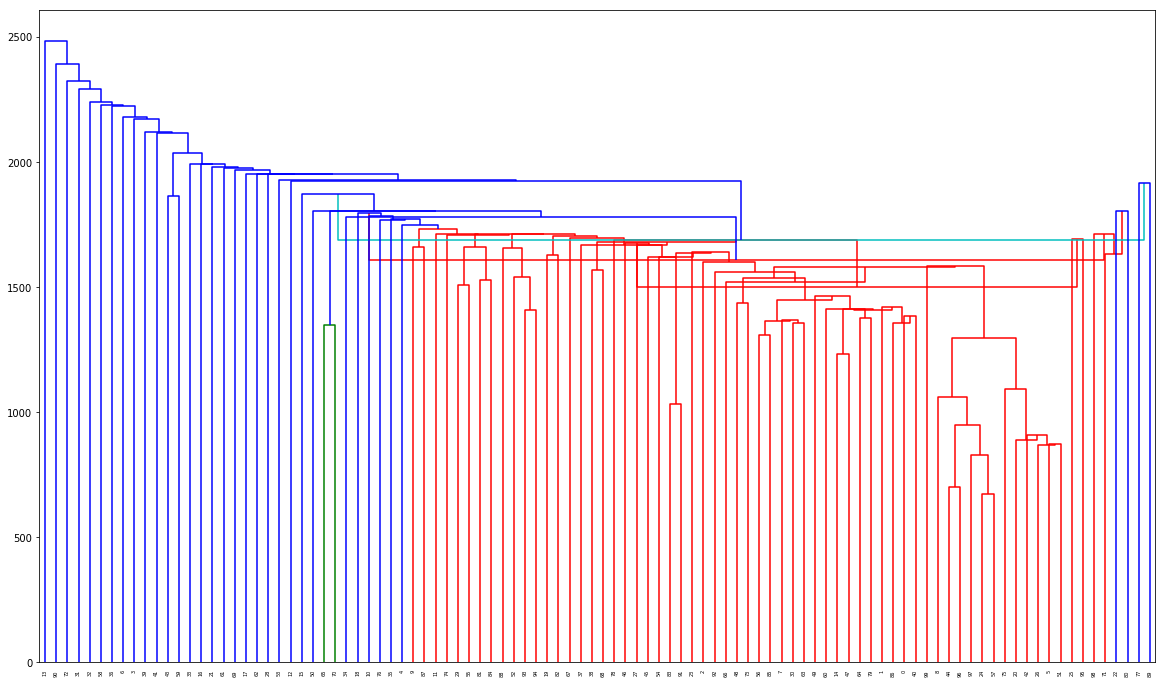

In [60]:
dendro('centroid')

In [46]:
len(rows)

1000

In [ ]:
X

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.311s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 614.418500
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.967560
[t-SNE] KL divergence after 1000 iterations: 0.979849


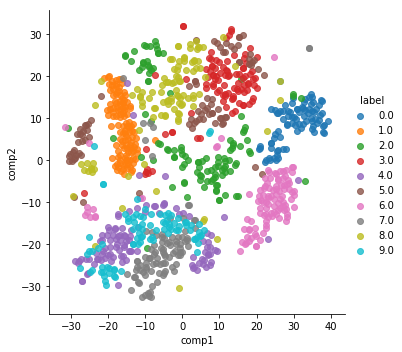

In [22]:
out = tsne()

In [64]:
X_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=50, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)